# Introduction to AI - Part1 - Question 2

In [1]:
#Impoting important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from treelib import Node, Tree
import treelib
import random

%matplotlib inline

In [2]:
data = pd.read_csv('coursework2.csv')

In [3]:
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,01/01/2011,1,0,1,0,6,0,2,14.11,18.18,0.81,0.16,331,654,985
1,2,02/01/2011,1,0,1,0,0,0,2,14.90,17.69,0.70,0.25,131,670,801
2,3,03/01/2011,1,0,1,0,1,1,1,8.05,9.47,0.44,0.25,120,1229,1349
3,4,04/01/2011,1,0,1,0,2,1,1,8.20,10.61,0.59,0.16,108,1454,1562
4,5,05/01/2011,1,0,1,0,3,1,1,9.31,11.46,0.44,0.19,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27/12/2012,1,1,12,0,4,1,2,10.42,11.33,0.65,0.35,247,1867,2114
727,728,28/12/2012,1,1,12,0,5,1,2,10.39,12.75,0.59,0.16,644,2451,3095
728,729,29/12/2012,1,1,12,0,6,0,2,10.39,12.12,0.75,0.12,159,1182,1341
729,730,30/12/2012,1,1,12,0,0,0,1,10.49,11.58,0.48,0.35,364,1432,1796


In [4]:
data['season'].value_counts()

3    188
2    184
1    181
4    178
Name: season, dtype: int64

In [5]:
data['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

In [6]:
data['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

In [7]:
data1 = pd.DataFrame(data=data[['season', 'workingday', 'weathersit', 'count']])

In [8]:
from matplotlib.ticker import StrMethodFormatter

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


<Figure size 1080x720 with 0 Axes>

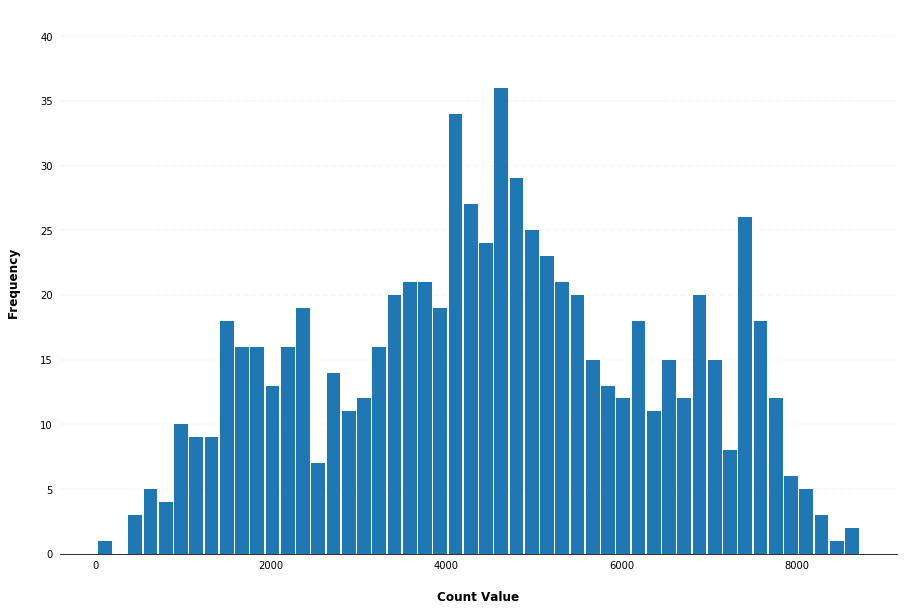

In [9]:
plt.figure(figsize=(15,10))
ax = data1.hist(column='count', bins=50, figsize=(15,10), grid=False, zorder=2, rwidth=0.9 )

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Count Value", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [10]:
data1['count'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: count, dtype: float64

In [11]:
use = []

for i in (data1['count']):
    if (i <= 3152):
        use.append('Low')
        
    elif (i > 3152 and i <= 5956):
        use.append('Medium') 
        
    elif (i > 5956):
        use.append('High') 

In [12]:
data1['usage'] = use

In [13]:
data1['usage'].value_counts()

Medium    365
Low       183
High      183
Name: usage, dtype: int64

In [14]:
#Dropping column count as it has no use further
data1.drop(['count'], axis=1, inplace=True)

In [15]:
#Dividing dependent and independent variables of the dataset
X = data1.iloc[: , :-1]
Y = data1.iloc[: , -1]

In [16]:
print(X.columns, "\n" ,Y.name)

Index(['season', 'workingday', 'weathersit'], dtype='object') 
 usage


# Function for Entropy

In [17]:
import math
from collections import Counter

In [18]:
def entropy(column):
    
    #Count of each unique value in a dictionary
    count = Counter(column)
      
    probabitity = []
    
    for i in count.values():
        
        prob = i / len(column)
        probabitity.append(prob)
    
    entropy = 0
    
    for val in probabitity:
        
        if val > 0:
            entropy += val * math.log(val, 2)
    
    return -entropy

In [19]:
print("Overall Entropy for column Usage is : {}".format(entropy(Y.to_list())))

Overall Entropy for column Usage is : 1.5006826446021595


# Function for Information Gain

In [20]:
def information_gain(attribute, target):
    
    #Creating a new dataframe to store the attribute and target values
    categories = pd.DataFrame()
    categories['attribute'] = attribute
    categories['target'] = target
    
    #Unique values in the column 
    unique = categories['attribute'].unique()
    
    parts = []
    
    for i in unique:
        
        parts.append((categories['target'].loc[categories['attribute']==i]).to_list())
        
    remainder = 0

    for i in parts:
        
        length = len(i)/len(categories)
        
        #Remainder for the attribute with the help of its entropy
        remainder += length*entropy(i)
    
    #Information Gain for the attribute
    gain = entropy(target) - remainder
        
    return gain

In [37]:
#Attribute with maximum information gain
ign = []
cols = X.columns.to_list()
for i in cols:
    ign.append(information_gain(X[i], Y))

print("Maximum Information Gain is for attribute {} : {}".format(cols[ign.index(max(ign))], max(ign)))

Maximum Information Gain is for attribute season : 0.272392158566078


# Building a Decision Tree

In [39]:
def plurality(column):
    
    #Find the unique values in the dataframe column
    unique = column.unique()
    
    #Frequency of each unique element in the dataframe column
    count = Counter(column)
    
    if len(set(count)) == 1: #If all the unique values's frequencies are equal, return a random unique value.
        return random.choice(unique)
        
    else: #If not, return the key with maximum frequency
        return max(count)

In [48]:
def decision_tree(df, tree, parent_id):
    attribute = df.iloc[: , : -1]
    target = df.iloc[: , -1]
    
    gains = []
    
    columns = attribute.columns
    
    for i in columns:
        gains.append(information_gain(attribute[i], target))
    
    #Calculating the maximum gain
    max_gain = max(gains)
    
    #Maximum gain column
    col_max_gain = columns[gains.index(max_gain)]
    
    #Unique values in that column
    unique = attribute[col_max_gain].unique()
    
    #Plurality check
    if (information_gain(attribute[col_max_gain], target) == 0):
        plu = plurality(target)
        tree.create_node(plu, parent = parent_id)
        return
    
    else:
        
        #loop for every unique value of the column 
        for i in unique:
            #print(i)
            new_node = tree.create_node(f"{col_max_gain} == {i}", parent = parent_id)    
            new_df1 = df[attribute[col_max_gain] == i]

            #Recursion
            decision_tree(new_df1, tree, new_node.identifier) 

In [ ]:
#Creating the root tree
tree_initial = Tree()
root = tree_initial.create_node(tag="Root", identifier="ROOT", parent=None)

In [49]:
decision_tree(data1, tree_initial, root.identifier)

In [51]:
tree_initial.show()

Root
├── season == 1
│   ├── weathersit == 1
│   │   ├── workingday == 0
│   │   │   └── Medium
│   │   └── workingday == 1
│   │       └── Medium
│   ├── weathersit == 2
│   │   ├── workingday == 0
│   │   │   └── Medium
│   │   └── workingday == 1
│   │       └── Medium
│   └── weathersit == 3
│       └── Low
├── season == 2
│   ├── weathersit == 1
│   │   ├── workingday == 0
│   │   │   └── Medium
│   │   └── workingday == 1
│   │       └── Medium
│   ├── weathersit == 2
│   │   ├── workingday == 0
│   │   │   └── Medium
│   │   └── workingday == 1
│   │       └── Medium
│   └── weathersit == 3
│       └── Low
├── season == 3
│   ├── weathersit == 1
│   │   ├── workingday == 0
│   │   │   └── Medium
│   │   └── workingday == 1
│   │       └── Medium
│   ├── weathersit == 2
│   │   ├── workingday == 0
│   │   │   └── Medium
│   │   └── workingday == 1
│   │       └── Medium
│   └── weathersit == 3
│       ├── workingday == 0
│       │   └── Medium
│       └── workingday == 1
│       

# Decision Tree with new attribute Tempbins

Low    : if temp < 12

Medium : if 12 <= temp < 24

High   : if temp >= 24

In [69]:
data2 = data.loc[ : , ['season', 'workingday', 'weathersit', 'temp']]

In [70]:
#Creating a new attribute "TEMPBINS"

In [71]:
bins = []

for i in (data2['temp']):
    if (i < 12):
        bins.append('Low')
        
    elif (i >= 12 and i < 24):
        bins.append('Medium')
        
    elif (i > 24):
        bins.append('High') 

In [72]:
data2['tempbins'] = bins
data2.drop('temp', axis=1, inplace=True)
data2['usage'] = data1['usage']

In [73]:
#New Dataframe
data2.head()

,season,workingday,weathersit,tempbins,usage
0,1,0,2,Medium,Low
1,1,0,2,Medium,Low
2,1,1,1,Low,Low
3,1,1,1,Low,Low
4,1,1,1,Low,Low


In [74]:
#New Decision Tree for new Dataframe

new_tree = Tree()
new_root = new_tree.create_node(tag="Root", identifier="ROOT", parent=None)

In [75]:
decision_tree(data2, new_tree, new_root.identifier)

In [76]:
new_tree.show()

Root
├── tempbins == High
│   ├── weathersit == 1
│   │   ├── season == 2
│   │   │   ├── workingday == 0
│   │   │   │   └── Medium
│   │   │   └── workingday == 1
│   │   │       └── Medium
│   │   ├── season == 3
│   │   │   ├── workingday == 0
│   │   │   │   └── Medium
│   │   │   └── workingday == 1
│   │   │       └── Medium
│   │   └── season == 4
│   │       └── Medium
│   ├── weathersit == 2
│   │   ├── season == 2
│   │   │   ├── workingday == 0
│   │   │   │   └── Medium
│   │   │   └── workingday == 1
│   │   │       └── Medium
│   │   ├── season == 3
│   │   │   ├── workingday == 0
│   │   │   │   └── Medium
│   │   │   └── workingday == 1
│   │   │       └── Medium
│   │   └── season == 4
│   │       ├── workingday == 0
│   │       │   └── Medium
│   │       └── workingday == 1
│   │           └── Medium
│   └── weathersit == 3
│       ├── season == 3
│       │   ├── workingday == 0
│       │   │   └── Medium
│       │   └── workingday == 1
│       │       └── Low
│     

In [86]:
#Attribute with maximum information gain for new dataframe
ign1 = []
cols1 = data2.columns.to_list()
cols1 = cols1[:-1]
for i in cols1:
    ign1.append(information_gain(data2[i], data2['usage']))

print("Maximum Information Gain is for attribute {} : {}".format(cols1[ign1.index(max(ign1))], max(ign1)))

Maximum Information Gain is for attribute tempbins : 0.2945924028910589
